In [16]:
import os
import pandas as pd
import numpy as np

import geopandas as gpd
import matplotlib.pyplot as plt

import statsmodels.api as sm 

import mapclassify as mc
import pycountry

import imageio as io

path = os.path.abspath(os.path.dirname(os.getcwd())) + '\\data'

In [17]:
info_article = pd.read_csv(path+'\\info\\info_article_o_8_n.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_8.csv')

In [104]:
def get_country_frame(info_article_k):
    
    country_list_name = []
    
    for i_article in range(info_article_k.shape[0]):
        
        country_list = eval(info_article_k.iloc[i_article]['country_list'])
        
        for i_country in country_list:
            
            i_country_name = i_country[0]
            country_list_name.append(i_country_name)
            
    country_dict = {}
    
    for key in country_list_name:
        country_dict[key] = country_dict.get(key, 0) + 1
        
    country_frame = pd.DataFrame(columns=['country_name', 'country_appear'])    
    
    for key in country_dict:
        country_name = key
        country_appear = country_dict[key]
        
        country_frame_add = pd.DataFrame([[country_name, country_appear]],
                                         columns=['country_name', 'country_appear'])
        country_frame=pd.concat([country_frame,country_frame_add])
    
    country_frame = country_frame.reset_index(drop = True)
    
    for i_country in range(country_frame.shape[0]):
        
        country_name = country_frame.iloc[i_country]['country_name']
        if country_name == 'Kosovo':
            country = '-99'
        else:
            country = pycountry.countries.get(name=country_name)
            country = country.alpha_3
            
        country_frame.loc[i_country, 'iso_a3'] = country    
    
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = world[world.name != "Antarctica"]
    
    world_value = pd.merge(world, country_frame, how='left')
    
    world_value.loc[((world_value['name']!='Kosovo') & 
                     (world_value['iso_a3']=='-99')), 'country_appear']= 0
    world_value = world_value.fillna(0)
    
    world_value = world_value.drop('country_name', axis =1)
    
    return country_frame, world_value

In [137]:
def draw_country_frame(info_article_k,i_year,epsg_code):
    
    country_frame, world_value = get_country_frame(info_article_k)
    
    fig, ax = plt.subplots(1, figsize=(10,15))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.xticks([]) 
    plt.yticks([])  
    
    # ax.set_title('name')
    world_value = world_value.to_crs(epsg=epsg_code)
    # epsg code : 4326, 3395 32633 32733
    world_value.plot(column='country_appear',
                     ax = ax,
                     cmap='YlGn', 
                     scheme='UserDefined',
                     classification_kwds={'bins':[0,1,10,20,50,100]},
                     legend=True,
                     legend_kwds = {'loc': 'lower left',
                                    'title': 'Number of Articles',
                                    'shadow': False,
                                    'fmt': '{:.0f}',
                                    'labels': ['0','1','2-10','11-20','21-50','50-100','>100']
                                    }
                    )
    
    plt.title(str(i_year))
    
    img = ax.get_figure()
    img.savefig(path+'\\picture\\'+'country_cum_eg_'+str(epsg_code)+'.png')
    
    return country_frame, world_value

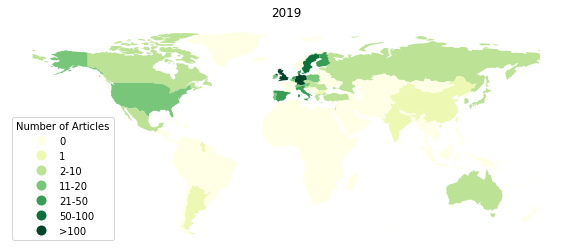

In [167]:
# example
info_article_i = info_article[info_article['year']<=2019]

country_frame, world_value = draw_country_frame(info_article_i, 2019, 4326)

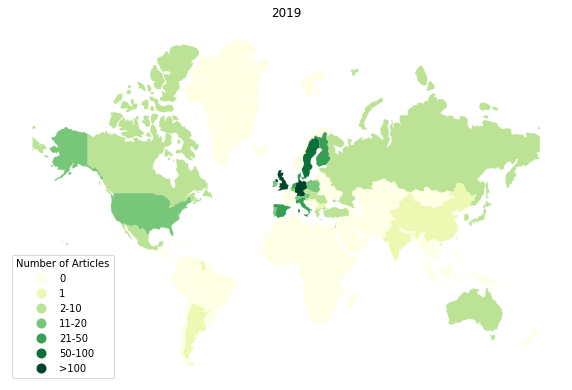

In [168]:
country_frame, world_value = draw_country_frame(info_article_i, 2019, 3395)

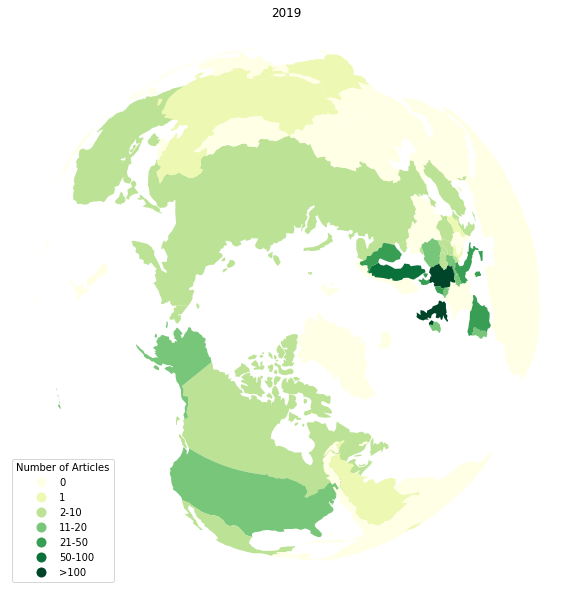

In [169]:
country_frame, world_value = draw_country_frame(info_article_i, 2019, 9001)

In [58]:
world_value.to_crs(epsg=32630)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_appear
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((179007.620 -18217241.312, 1798...",0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((4925741.644 -131556.334, 4949107.782...",0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-59333.937 3072007.387, -59629.978 3...",0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-3627066.888 12604318.278, -36...",4
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-3627066.888 12604318.278, -37...",6
...,...,...,...,...,...,...,...
171,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((2190922.821 5320953.512, 2190923.678...",0
172,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((2396123.132 4981013.572, 2376769.669...",0
173,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((2462921.927 4911703.654, 2445505.974...",0
174,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-7284136.954 2237149.882, -7166066.4...",0


In [ ]:
for i_year in range(1999, 2022):

    info_article_i = info_article[info_article['year']<=i_year]
    
    try:
        country_frame = draw_country_frame(info_article_i, i_year)
        
    except:
        country_frame = draw_country_frame_2(info_article_i, i_year)

In [15]:
# draw_country_frame(info_article_i, 2021)